# Introduction: ML and the Physical World

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2022-10-06

**Abstract**: This lecture will introduce the course and provide a
motivation and a historical account of machine learning and mathematical
modelling. It will further detail the special challenges associated with
the application of machine learning to physical systems. We will also
outline the objectives of the course and how it will be structured over
the term.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

# Course Overview

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_mlphysical/includes/overview-2022.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_mlphysical/includes/overview-2022.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Machine Learning and the Physical World is an eight-week course that
introduces you to the concepts that are important as we try to use
machine learning techniques to better understand the world around us.

Welcome to this course!

-   Week 1:
    1.  Introduction. Lecturer: Neil D. Lawrence
    2.  Quantification of Beliefs. Lecturer: Carl Henrik Ek
-   Week 2:
    1.  Gaussian processes. Lecturer: Carl Henrik Ek
    2.  Simulation. Lecturer: Neil D. Lawrence
-   Week 3:
    1.  Emulation. Lecturer: Neil D. Lawrence
    2.  Sequential Decision Making Under Uncertainty: Bayesian
        Inference. Lecturer: Carl Henrik Ek
-   Week 4:
    1.  Probabilistic Numerics. Lecturer: Carl Henrik Ek
    2.  Emukit and Experimental Design. Lecturer: Neil D. Lawrence
-   Week 5:
    1.  Sensitivity Analysis. Lecturer: Neil D. Lawrence
    2.  Multifidelity Modelling. Lecturer: Neil D. Lawrence

## Special Topics

For weeks 6-8 we will have a series of guest lectures, followed by
discussions that will relate the material you have learnt to
applications in the real world.

These guest lectures focus on various approaches to simulating the
physical world around us, and we will invite you (as part of your mini
projects) to consider how important questions around these approaches
can be answered as part with the techniques you’ve learnt in the module.

In 2020 the special topics included Simulation in the Pandemic. This
will be presented by the Royal Society convened DELVE team who’ve been
providing policy advice to government during the pandemic. The
particular focus will be on simulations that were used to inform a
report on the Test, Trace, Isolate system (The DELVE Initiative, 2020).

Also in 2020, we looked at simulation and surrogate modelling in climate
models with the British Antarctic Survey.

Finally, with Javier Gonzalez of Microsoft Research, we considered
approaches in computational biology and medicine.

In 2021 we looked at force spectroscopy with Marie Synakewicz, supply
chain with Jordan Bell-Masterson, climate science with Scott Hoskins and
elasticity data with Tim Dodwell.

This year we are planning examples on understanding machine learning
models, the Antartic ice sheet and more!

## Assessment

There are two forms of assessment. Firstly, we will ask you to a “lab
sheet” of answer (based on the notes we provide). The lab can be
completed using python and the jupyter notebook (for example on
[colab](https://colab.research.google.com/)). This will be completed by
Week 5 and is worth 15%.

We will use the examples we present this year to help inspire a set of
mini projects for you to work on in small groups. The aim will be to
produce a report on the different challenges, detailing what questions
you asked and how you answered them using the techniques we’ll teach.
This is submitted first day of Lent term and is worth 85%.

## Course Material

Since the breakthrough results in machine learning as applied to tasks
in computer vision, speech recognition, language translation, etc.,
there has been an increasing interest in machine learning techniques as
an approach to artificial intelligence.

However, one area where machine learning has (perhaps) made less
progress is in those problems where we have a physical understanding of
the system.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## notutils

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/notutils-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/notutils-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This small package is a helper package for various notebook utilities
used

The software can be installed using

In [2]:
%pip install notutils

Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub:
<https://github.com/lawrennd/notutils>

Once `notutils` is installed, it can be imported in the usual manner.

In [3]:
import notutils

## mlai

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/mlai-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/mlai-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The `mlai` software is a suite of helper functions for teaching and
demonstrating machine learning algorithms. It was first used in the
Machine Learning and Adaptive Intelligence course in Sheffield in 2013.

The software can be installed using

In [4]:
%pip install mlai

Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/mlai>

Once `mlai` is installed, it can be imported in the usual manner.

In [5]:
import mlai

## Discovery of Ceres

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/ceres-discovery.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/ceres-discovery.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

On New Year’s Eve in 1800, Giuseppe Piazzi, an Italian Priest, born in
Lombardy, but installed in a new Observatory at the University viewed a
faint smudge through his telescope.

Piazzi was building a star catalogue.

Unbeknownst to him, Piazzi was also participating in an international
search. One that he’d been volunteered for by the Hungarian astronomer
Franz von Zach. But without even knowing that he’d joined the search
party, Piazzi had discovered their target a new planet.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/ceres-optimized.png" style="width:60%">

Figure: <i>A blurry image of Ceres taken from the Hubble space
telescope. Piazzi first observed the planet while constructing a star
catalogue. He was confirming the position of the stars in a second night
of observation when he noted one of them was moving. The name planet is
originally from the Greek for ‘wanderer.’</i>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/giuseppe-piazzi.png" style="width:50%">

Figure: <i>Giuseppe Piazzi (1746-1826) was an Italian Catholic priest
and an astronomer. Jesuits had been closely involved in education,
following their surpression in the Kingdom of Naples and Sicily, Piazzi
was recruited as part of a drive to revitalize the University of
Palermo. His funding was from King Ferdinand I and enabled him to buy
high quality instruments from London.</i>

In [6]:
import notutils as nu
nu.display_google_book(id='XG43AQAAMAAJ', page='PA88')

Figure: <i>Announcement of Giuseppe Piazzi’s discovery in the “Monthly
Magazine” (also known as the British Register). This announcement is
made in August 1801, 7 months after Giuseppe Piazzi first observed
Ceres.</i>

The planet’s location was a prediction. It was a missing planet, other
planets had been found through a formula, a law, that represented their
distance from the sun: $$
a = 0.4 + 0.3 \times 2^m
$$ where $m=-\infty, 0, 1, 2, \dots$.

In [7]:
import numpy as np

In [8]:
m = np.asarray([-np.inf, 0, 1, 2, 3, 4, 5, 6])
index = np.asarray(range(len(m)))
planets = ['Mercury', 'Venus', 'Earth', 'Mars', '*', 'Jupiter', 'Saturn', 'Uranus']
a = 0.5 + 0.3*2**m

In [9]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

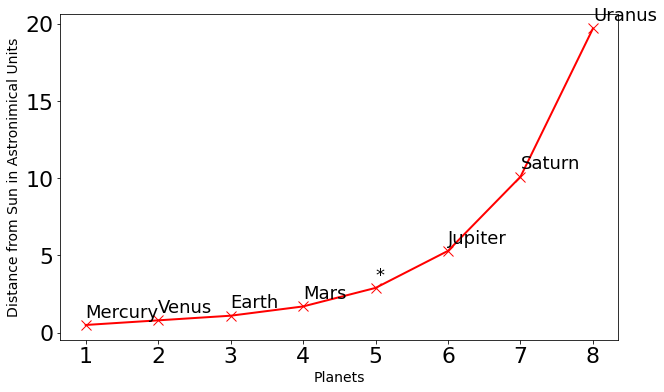

In [10]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(index+1, a, 'rx-', markersize=10, linewidth=2)
for x,y in zip(index, a):
  ax.text(x+1, y+0.5, planets[x], fontsize=18)
ax.set_xlabel('Planets', fontsize=14)
ax.set_ylabel('Distance from Sun in Astronimical Units', fontsize=14)
mlai.write_figure('bodes-law.svg', directory='./physics')

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/bodes-law.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The Titius-Bode law was a relatively obscure empirical
observation about how the planets are distributed across the solar
system. It became well known after the discovery of Uranus by Herschel
in 1781 which was found at the location the law predicts for the 8th
planet.</i>

When [this law](https://en.wikipedia.org/wiki/Titius%E2%80%93Bode_law)
was published it fitted all known planets: Mercury, Venus, Earth, Mars,
Jupiter and Saturn. Although there was a gap between the fourth and
fifth planets (between Mars and Jupiter). In 1781 William Herschel
discovered Uranus. It was in the position predicted by the formula. One
of the originators of the formula, Johann Elert Bode urged astronomers
to search for the missing planet, to be situated between Mars and
Jupiter. Franz Xaver von Zach formed the United Astronomical Society,
also known as the Celestial Police. But before the celestial police
managed to start their search, Piazzi, without even knowing he was a
member completed the search. Piazzi first observed the new planet in the
early hours of January 1st 1801. He continued to observe it over the
next 42 days. Initially he thought it may be a comet, but as he watched
it he became convinced he’d found a planet. The international search was
over before it started.

Unfortunately, there was a problem. Once he’d found the planet, Piazzi
promptly lost it. Piazzi was keen not just to discover the planet, but
to to be known as the determiner of its orbit. He took observations
across the months of January and February, working to find the orbit.
Unfortunately, he was unable to pin it down. He became ill, and by the
time the dat awas revealed to the wider community through von Zach’s
journal, Monatlicher Correspondenz, the new planet had been lost behind
the sun.

In [11]:
import notutils as nu
nu.display_google_book(id='JBw4AAAAMAAJ', page='PA280')

Figure: <i>Page from the publication *Monatliche Correspondenz* that
shows Piazzi’s observations of the new planet Piazzi (n.d.) .</i>

<!--[<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/ceres-beobachtung-von-piazzi.png" style="width:100%">](https://play.google.com/books/reader?printsec=frontcover&output=reader&id=JBw4AAAAMAAJ&pg=GBS.PA280)-->

In [12]:
%pip install pods

Note: you may need to restart the kernel to use updated packages.


In [13]:
import urllib.request

In [14]:
urllib.request.urlretrieve('http://server3.sky-map.org/imgcut?survey=DSS2&img_id=all&angle=4&ra=3.5&de=17.25&width=1600&height=1600&projection=tan&interpolation=bicubic&jpeg_quality=0.8&output_type=png','ceres-sky-background.png')

('ceres-sky-background.png', <http.client.HTTPMessage at 0x7f9c7870bd60>)

In [15]:
import pods

 /Users/neil/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning:The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.


In [16]:
data = pods.datasets.ceres()
right_ascension = data['data']['Gerade Aufstig in Zeit']
declination = data['data']['Nordlich Abweich']

In [17]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot

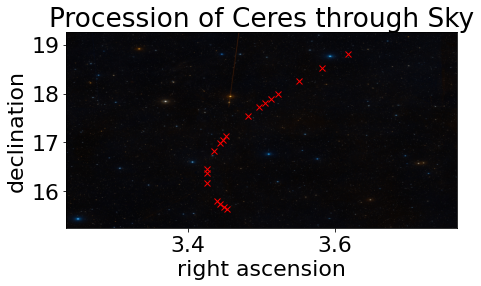

In [18]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
A = plt.imread('ceres-sky-background.png', format="png")
ax.imshow(A, extent=[3.5-4/15, 3.5+4/15, 15.25, 19.25], aspect=1/15)
ax.plot(right_ascension, declination, 'rx')
ax.set_xlabel('right ascension')
ax.set_ylabel('declination')
ax.set_title('Procession of Ceres through Sky')
mlai.write_figure('ceres-data.svg', directory='./ceres')

<!--dayPrev = -2;
    for i = 1:size(ceresData, 1)
      day = ceresData(i, 1);
      if day - dayPrev>2
        if ~isnan(rightAscension(i)) && ~isnan(declination(i))
          text(rightAscension(i)+0.025, declination(i), datestr(day, '1801/mm/dd'));
          dayPrev = day;
        end
      end
    end
    set(a, 'color', blueColor, 'markersize', 12)
    set(gca, 'xlim', [3.25 3.75])
    set(gca, 'ylim', [15.5 19])
    xlim = get(gca, 'xlim');
    ylim = get(gca, 'ylim');
    set(gca, 'xtick', [3.25 3.5 3.75])
    set(gca, 'xticklabel', {'$3$h$15^\\prime$', '$3$h$30^\\prime$', '$3$h$45^\\prime$'})
    set(gca, 'ytick', [15.5 16 16.5 17 17.5 18 18.5 19])
    set(gca, 'yticklabel', {'$15^\\circ 30^\\prime$', '$16^\\circ$', '$16^\\circ 30^\\prime$', '$17^\\circ$', '$17^\\circ 30^\\prime$', '$18^\\circ$', '$18^\\circ 30^\\prime$', '$19^\\circ$'})
    set(gca, 'box', 'off')
    validData = find(~isnan(declination));
    times = ceresData(validData, 1);
    axis off
    printLatexPlot('ceresData', '../../../ceres/tex/diagrams', 0.9*textWidth)-->

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/ceres-data.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Plot of the declination and right ascension that Piazzi
recorded as Ceres passed through the sky in 1800. Gaps are evenings
where Piazzi was unable to make an observation.</i>

Piazzi was able to attempt to predict the orbit because of Kepler’s laws
of planetary motion. Johannes Kepler had outlined the way in which
planets move according to elliptical shapes, and comets move according
to parabolic shapes.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ml/godfrey-kneller-isaac-newton-1689.png" style="width:40%">

Figure: <i>Godfrey Kneller portrait of Isaac Newton</i>

Later Isaac Newton was able to describe the underlying laws of motion
that underpinned Kepler’s laws. This was the enlightenment. An age of
science and reason driven by reductionist approaches to the natural
world. The enlightenment scientists were able to read and understand
each other’s work through the invention of the printing press. Kepler
died in 1630, 12 years before Newton was born in 1642. But Kepler’s
ideas were able to influence Newton and his peers, and the understanding
of gravity became an objective of the nascent Royal Society.

The sharing of information in printed form had evolved by the time of
Piazzi, and the collected discoveries of the astronomic world were being
shared in Franz von Zach’s monthly journal. It was here that Piazzi’s
observations were eventually published, some 7 months after the planet
was lost.

It was also here that a young German mathematician read about the
international hunt for the lost planet. Carl Friedrich Gauss was a
23-year-old mathematician working from Göttingen. He combined Kepler’s
laws with Piazzi’s data to make predictions about where the planet would
be found. In doing so, he also developed the method of least squares,
and incredibly was able to fit the relatively complex model to the data
with a high enough degree of accuracy that astronomers were able to look
to the skies to try to recover the planet.

Almost exactly one year after it was lost, Ceres was recovered by Franz
von Zach. Gauss had combined model with data to make a prediction and in
doing so a new planet was discovered Gauss (1802).

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/bendixen-carl-friedrich-gauss-1828.png" style="width:40%">

Figure: <i>Carl Friedrich Gauss in 1828. He became internationally
famous 27 years earlier for recovering the planet Ceres with a
mathematical prediction.</i>

It is this combination of *model* and *data* that underpins machine
learning but notice that here it has also been delivered through a
mechanistic understanding of the way the planets move. This
understanding is derived from natural laws that are explicitly
incorporated into the model. Kepler’s laws derive from Newton’s
mathematical representation of gravity.

But there was a problem. The laws don’t precisely fit the data.

In [19]:
import notutils as nu
nu.display_google_book(id='JBw4AAAAMAAJ', page='PA647')

Figure: <i>Gauss’s prediction of Ceres’s orbit as published in Franz von
Zach’s Monatliche Correspondenz. He gives the location where the planet
may be found, and then some mathematics for making other predictions. He
doesn’t share his method, and this later leads to a priority dispute
with Legendre around least-squares, which Gauss used to form the fit</i>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/piazzi-cerere.png" style="width:40%">

Figure: <i>Piazzi achieved his glory after the planet was discovered.
Ceres is an agricultural god (in Greek tradition Demeter). She was
associated with Sicily, where Piazzi was working when he made the
discovery.</i>

Unfortunately, the story doesn’t end so well for the Titsius-Bode law.
In 1846 Neptune was discovered, not in the place predicted by the law
(it should be closer to where Pluto was eventually found). And Ceres was
found to be merely the largest object in the asteroid belt. It was
recategorized as a Dwarf planet.

<table>
<tr>
<td width>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/ceres-optimized.png" style="width:7%">

</td>
<td width>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/full-moon-2010.png" style="width:27%">

</td>
<td width>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/the-earth-seen-from-apollo-17.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The surface area of Ceres is 2,850,000 square kilometers,
it’s a little bigger than Greenland, but quite a lot colder. The moon is
about 27% of the width of the Earth. Ceres is 7% of the width of the
Earth.</i>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/planets-2008.jpg" style="width:80%">

Figure: <i>The location of Ceres as ordered in the solar system. While
no longer a planet, Ceres is the unique Dwarf Planet in the inner solar
system. This image from
http://upload.wikimedia.org/wikipedia/commons/c/c4/Planets2008.jpg</i>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ceres/ceres.jpg" style="width:60%">

Figure: <i>Ceres as photographed by the Dawn Mission. The photo
highlights Ceres’s ‘bright spots’ which are thought to be a material
with a high level of reflection (perhaps ice or salt). This image from
http://www.popsci.com/sites/popsci.com/files/styles/large_1x\_/public/dawn-two-bright-spots.jpg?itok=P5oeSRrc</i>

Let’s have a look at how Gauss determined the orbit of Ceres and how
(taking ideas from Pierre Simon Laplace) he used approaches that would
prove to be conceptually fundamental to machine learning and statistical
approaches.

## Overdetermined System

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/overdetermined-system.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/overdetermined-system.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The challenge with a linear model is that it has two unknowns, $m$, and
$c$. Observing data allows us to write down a system of simultaneous
linear equations. So, for example if we observe two data points, the
first with the input value, $x_1 = 1$ and the output value, $y_1 =3$ and
a second data point, $x= 3$, $y=1$, then we can write two simultaneous
linear equations of the form.

point 1: $x= 1$, $y=3$ $$
3 = m + c
$$ point 2: $x= 3$, $y=1$ $$
1 = 3m + c
$$

The solution to these two simultaneous equations can be represented
graphically as

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ml/over_determined_system003.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>The solution of two linear equations represented as the fit
of a straight line through two data</i>

The challenge comes when a third data point is observed, and it doesn’t
fit on the straight line.

point 3: $x= 2$, $y=2.5$ $$
2.5 = 2m + c
$$

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ml/over_determined_system004.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>A third observation of data is inconsistent with the solution
dictated by the first two observations</i>

Now there are three candidate lines, each consistent with our data.

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ml/over_determined_system007.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>Three solutions to the problem, each consistent with two
points of the three observations</i>

This is known as an *overdetermined* system because there are more data
than we need to determine our parameters. The problem arises because the
model is a simplification of the real world, and the data we observe is
therefore inconsistent with our model.

In [ ]:
import mlai.plot as plot

In [ ]:
plot.over_determined_system(diagrams='./ml')

In [ ]:
from ipywidgets import IntSlider
import notutils as nu

In [ ]:
nu.display_plots('over_determined_system{samp:0>3}.svg',
                  directory='./ml', 
                  samp=IntSlider(1,1,7,1))

## Pierre-Simon Laplace

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/overdetermined-laplace-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/overdetermined-laplace-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The solution was proposed by Pierre-Simon Laplace. His idea was to
accept that the model was an incomplete representation of the real
world, and the way it was incomplete is *unknown*. His idea was that
such unknowns could be dealt with through probability.

### Pierre-Simon Laplace

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/laplace-portrait.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/laplace-portrait.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ml/Pierre-Simon_Laplace.png" style="width:30%">

Figure: <i>Pierre-Simon Laplace 1749-1827.</i>

## Laplace’s Demon

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/laplaces-demon.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/laplaces-demon.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import notutils as nu
nu.display_google_book(id='1YQPAAAAQAAJ', page='PR17-IA2')

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/philosophicaless00lapliala_16_cropped.png" style="width:60%">

Figure: <i>English translation of Laplace’s demon, taken from the
Philosophical Essay on probabilities Laplace (1814) pg 3.</i>

One way of viewing what Laplace is saying is that we can take “the
forces by which nature is animated” or our best
mathematical/computational abstraction of that which we would call the
*model* and combine it with the “respective situation of the beings who
compose it” which I would refer to as the *data* and if we have an
“intelligence sufficiently vast enough to submit these data to
analysis,” or sufficient *compute* then we would have a system for which
“nothing would be uncertain and the future, as the past, would be
present in its eyes,” or in other words we can make a *prediction*. Or
more succinctly put we have

<center>

$$
\text{model} + \text{data} \stackrel{\text{compute}}{\rightarrow} \text{prediction}.$$

</center>

Laplace’s demon has been a recurring theme in science, we can also find
it in Stephen Hawking’s book *A Brief History of Time* (*A brief history
of time*, 1988).

> If we do discover a theory of everything … it would be the ultimate
> triumph of human reason-for then we would truly know the mind of God
>
> Stephen Hawking in *A Brief History of Time* 1988

But is it really that simple? Do we just need more and more accurate
models and more and more data?

## Laplace’s Gremlin

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/laplaces-gremlin.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/laplaces-gremlin.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

> The curve described by a simple molecule of air or vapor is regulated
> in a manner just as certain as the planetary orbits; the only
> difference between them is that which comes from our ignorance.
> Probability is relative, in part to this ignorance, in part to our
> knowledge. We know that of three or greater number of events a single
> one ought to occur; but nothing induces us to believe that one of them
> will occur rather than the others. In this state of indecision it is
> impossible for us to announce their occurrence with certainty. It is,
> however, probable that one of these events, chosen at will, will not
> occur because we see several cases equally possible which exclude its
> occurrence, while only a single one favors it.
>
> — Pierre-Simon Laplace (Laplace, 1814), pg 5

The representation of ignorance through probability is the true message
of Laplace, I refer to this message as “Laplace’s gremlin,” because it
is the gremlin of uncertainty that interferes with the demon of
determinism to mean that our predictions are not deterministic.

Our separation of the uncertainty into the data, the model and the
computation give us three domains in which our doubts can creep into our
ability to predict. Over the last three lectures we’ve introduced some
of the basic tools we can use to unpick this uncertainty. You’ve been
introduced to, (or have yow reviewed) *Bayes’ rule*. The rule, which is
a simple consequence of the product rule of probability, is the
foundation of how we update our beliefs in the presence of new
information.

The real point of Laplace’s essay was that we don’t have access to all
the data, we don’t have access to a complete physical understanding, and
as the example of the Game of Life shows, even if we did have access to
both (as we do for “Conway’s universe”) we still don’t have access to
all the compute that we need to make deterministic predictions. There is
uncertainty in the system which means we can’t make precise predictions.

I like to call this “Laplace’s Gremlin.” Gremlins are imaginary
creatures used as an explanation of failure in aircraft, causing
crashes. In that sense the Gremlin represents the uncertainty that a
pilot felt about what might go wrong in a plane which might be
“theoretically sound” but in practice is poorly maintained or exposed to
conditions that take it beyond its design criteria. Laplace’s gremlin is
all the things that your model, data and ability to compute don’t
account for bringing about failures in your ability to predict.
Laplace’s Gremlin is the uncertainty in the system.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ai/gremlins-think-its-fun-to-hurt-you.jpg" style="width:40%">

Figure: <i>Gremlins are seen as the cause of a number of challenges in
this World War II poster.</i>

Laplace’s concept was that the reason that the data doesn’t match up to
the model is because of unconsidered factors, and that these might be
well represented through probability densities. He tackles the challenge
of the unknown factors by adding a variable, $\epsilon$, that represents
the unknown. In modern parlance we would call this a *latent* variable.
But in the context Laplace uses it, the variable is so common that it
has other names such as a “slack” variable or the *noise* in the system.

point 1: $x= 1$, $y=3$ $$
3 = m + c + \epsilon_1
$$ point 2: $x= 3$, $y=1$ $$
1 = 3m + c + \epsilon_2
$$ point 3: $x= 2$, $y=2.5$ $$
2.5 = 2m + c + \epsilon_3
$$

Laplace’s trick has converted the *overdetermined* system into an
*underdetermined* system. He has now added three variables,
$\{\epsilon_i\}_{i=1}^3$, which represent the unknown corruptions of the
real world. Laplace’s idea is that we should represent that unknown
corruption with a *probability distribution*.

## A Probabilistic Process

However, it was left to an admirer of Laplace to develop a practical
probability density for that purpose. It was Carl Friedrich Gauss who
suggested that the *Gaussian* density (which at the time was unnamed!)
should be used to represent this error.

The result is a *noisy* function, a function which has a deterministic
part, and a stochastic part. This type of function is sometimes known as
a probabilistic or stochastic process, to distinguish it from a
deterministic process.

## Hydrodynamica

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/daniel-bernoulli-hydrodynamica.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/daniel-bernoulli-hydrodynamica.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

When Laplace spoke of the curve of a simple molecule of air, he may well
have been thinking of Daniel Bernoulli (1700-1782). Daniel Bernoulli was
one name in a prodigious family. His father and brother were both
mathematicians. Daniel’s main work was known as *Hydrodynamica*.

In [ ]:
import notutils as nu
nu.display_google_book(id='3yRVAAAAcAAJ', page='PP7')

Figure: <i>Daniel Bernoulli’s *Hydrodynamica* published in 1738. It was
one of the first works to use the idea of conservation of energy. It
used Newton’s laws to predict the behaviour of gases.</i>

Daniel Bernoulli described a kinetic theory of gases, but it wasn’t
until 170 years later when these ideas were verified after Einstein had
proposed a model of Brownian motion which was experimentally verified by
Jean Baptiste Perrin.

In [ ]:
import notutils as nu
nu.display_google_book(id='3yRVAAAAcAAJ', page='PA200')

Figure: <i>Daniel Bernoulli’s chapter on the kinetic theory of gases,
for a review on the context of this chapter see Mikhailov (n.d.). For
1738 this is extraordinary thinking. The notion of kinetic theory of
gases wouldn’t become fully accepted in Physics until 1908 when a model
of Einstein’s was verified by Jean Baptiste Perrin.</i>

## Entropy Billiards

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/entropy-billiards.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/entropy-billiards.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<canvas id="multiball-canvas" width="700" height="500" style="border:1px solid black;display:inline;text-align:left ">
</canvas>

Entropy:

<output id="multiball-entropy">
</output>

<button id="multiball-newball" style="text-align:right">

New Ball

</button>
<button id="multiball-pause" style="text-align:right">

Pause

</button>
<button id="multiball-skip" style="text-align:right">

Skip 1000s

</button>
<button id="multiball-histogram" style="text-align:right">

Histogram

</button>

<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
<script src="../scripts//ballworld/ballworld.js"></script>
<script src="../scripts//ballworld/multiball.js"></script>

Figure: <i>Bernoulli’s simple kinetic models of gases assume that the
molecules of air operate like billiard balls.</i>

In [ ]:
import numpy as np

In [ ]:
p = np.random.randn(10000, 1)
xlim = [-4, 4]
x = np.linspace(xlim[0], xlim[1], 200)
y = 1/np.sqrt(2*np.pi)*np.exp(-0.5*x*x)

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(x, y, 'r', linewidth=3)
ax.hist(p, 100, density=True)
ax.set_xlim(xlim)

mlai.write_figure('gaussian-histogram.svg', directory='./ml')

Another important figure for Cambridge was the first to derive the
probability distribution that results from small balls banging together
in this manner. In doing so, James Clerk Maxwell founded the field of
statistical physics.

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ml/gaussian-histogram.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>James Clerk Maxwell 1831-1879 Derived distribution of
velocities of particles in an ideal gas (elastic fluid).</i>

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/james-clerk-maxwell.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/boltzmann2.jpg" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/j-w-gibbs.jpg" style="width:100%">

</td>
</tr>
</table>

Figure: <i>James Clerk Maxwell (1831-1879), Ludwig Boltzmann (1844-1906)
Josiah Willard Gibbs (1839-1903)</i>

Many of the ideas of early statistical physicists were rejected by a
cadre of physicists who didn’t believe in the notion of a molecule. The
stress of trying to have his ideas established caused Boltzmann to
commit suicide in 1906, only two years before the same ideas became
widely accepted.

In [ ]:
import notutils as nu
nu.display_google_book(id='Vuk5AQAAMAAJ', page='PA373')

Figure: <i>Boltzmann’s paper Boltzmann (n.d.) which introduced the
relationship between entropy and probability. A translation with notes
is available in Sharp and Matschinsky (2015).</i>

The important point about the uncertainty being represented here is that
it is not genuine stochasticity, it is a lack of knowledge about the
system. The techniques proposed by Maxwell, Boltzmann and Gibbs allow us
to exactly represent the state of the system through a set of parameters
that represent the sufficient statistics of the physical system. We know
these values as the volume, temperature, and pressure. The challenge for
us, when approximating the physical world with the techniques we will
use is that we will have to sit somewhere between the deterministic and
purely stochastic worlds that these different scientists described.

One ongoing characteristic of people who study probability and
uncertainty is the confidence with which they hold opinions about it.
Another leader of the Cavendish laboratory expressed his support of the
second law of thermodynamics (which can be proven through the work of
Gibbs/Boltzmann with ean emphatic statement at the beginning of his
book.

<table>
<tr>
<td width="49%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/arthur-stanley-eddington.jpg" style="width:">

</td>
<td width="49%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/natureofphysical00eddi_7.png" style="width:">

</td>
</tr>
</table>

Figure: <i>Eddington’s book on the Nature of the Physical World
(Eddington, 1929)</i>

The same Eddington is also unfortunately famous for dismissing the ideas
of a young Chandrasekhar who had come to Cambridge to study in the
Cavendish lab. Chandrasekhar demonstrated the limit at which a star
would collapse under its own weight to a singularity, but when he
presented the work to Eddington, he was dismissive suggesting that there
“must be some natural law that prevents this abomination from
happening.”

<table>
<tr>
<td width="49%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/natureofphysical00eddi_100.png" style="width:80%">

</td>
<td width="49%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/ChandraNobel.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Chandrasekhar (1910-1995) derived the limit at which a star
collapses in on itself. Eddington’s confidence in the 2nd law may have
been what drove him to dismiss Chandrasekhar’s ideas, humiliating a
young scientist who would later receive a Nobel prize for the work.</i>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/natureofphysical00eddi_100_cropped.png" style="width:60%">

Figure: <i>Eddington makes his feelings about the primacy of the second
law clear. This primacy is perhaps because the second law can be
demonstrated mathematically, building on the work of Maxwell, Gibbs and
Boltzmann. Eddington (1929)</i>

Presumably he meant that the creation of a black hole seemed to
transgress the second law of thermodynamics, although later Hawking was
able to show that blackholes do evaporate, but the time scales at which
this evaporation occurs is many orders of magnitude slower than other
processes in the universe.

# Underdetermined System

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/underdetermined-system.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/underdetermined-system.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai.plot as plot

In [ ]:
plot.under_determined_system(diagrams='./ml')

What about the situation where you have more parameters than data in
your simultaneous equation? This is known as an *underdetermined*
system. In fact, this set up is in some sense *easier* to solve, because
we don’t need to think about introducing a slack variable (although it
might make a lot of sense from a *modelling* perspective to do so).

The way Laplace proposed resolving an overdetermined system, was to
introduce slack variables, $\epsilon_i$, which needed to be estimated
for each point. The slack variable represented the difference between
our actual prediction and the true observation. This is known as the
*residual*. By introducing the slack variable, we now have an additional
$n$ variables to estimate, one for each data point, $\{\epsilon_i\}$.
This turns the overdetermined system into an underdetermined system.
Introduction of $n$ variables, plus the original $m$ and $c$ gives us
$n+2$ parameters to be estimated from $n$ observations, which makes the
system *underdetermined*. However, we then made a probabilistic
assumption about the slack variables, we assumed that the slack
variables were distributed according to a probability density. And for
the moment we have been assuming that density was the Gaussian,
$$\epsilon_i \sim \mathcal{N}\left(0,\sigma^2\right),$$ with zero mean
and variance $\sigma^2$.

The follow up question is whether we can do the same thing with the
parameters. If we have two parameters and only one unknown, can we place
a probability distribution over the parameters as we did with the slack
variables? The answer is yes.

## Underdetermined System

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
nu.display_plots('under_determined_system{samp:0>3}.svg', 
                 directory='./ml', samp=IntSlider(0, 0, 9, 1))

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ml/under_determined_system009.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>An underdetermined system can be fit by considering
uncertainty. Multiple solutions are consistent with one specified
point.</i>

## Brownian Motion and Wiener

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/brownian-wiener.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_physics/includes/brownian-wiener.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Robert Brown was a botanist who was studying plant pollen in 1827 when
he noticed a trembling motion of very small particles contained within
cavities within the pollen. He worked hard to eliminate the potential
source of the movement by exploring other materials where he found it to
be continuously present. Thus, the movement was not associated, as he
originally thought, with life.

In 1905 Albert Einstein produced the first mathematical explanation of
the phenomenon. This can be seen as our first model of a ‘curve of a
simple molecule of air.’ To model the phenomenon Einstein introduced
stochasticity to a differential equation. The particles were being
peppered with high-speed water molecules, that was triggering the
motion. Einstein modelled this as a stochastic process.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/Albert_Einstein_photo_1921.jpg" style="width:40%">

Figure: <i>Albert Einstein’s 1905 paper on Brownian motion introduced
stochastic differential equations which can be used to model the ‘curve
of a simple molecule of air.’</i>

Norbert Wiener was a child prodigy, whose father had schooled him in
philosophy. He was keen to have his son work with the leading
philosophers of the age, so at the age of 18 Wiener arrived in Cambridge
(already with a PhD). He was despatched to study with Bertrand Russell
but Wiener and Russell didn’t get along. Wiener wasn’t persuaded by
Russell’s ideas for theories of knowledge through logic. He was more
aligned with Laplace and his desire for a theory of ignorance. In is
autobiography he relates it as the first thing he could see his father
was proud of (at around the age of 10 or 11) (Wiener, 1964).

<table>
<tr>
<td width="30%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//philosophy/Bertrand_Russell_1957.jpg" style="width:100%">

</center>
</td>
<td width="30%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/Albert_Einstein_photo_1921.jpg" style="width:85%">

</center>
</td>
<td width="30%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/Norbert_wiener.jpg" style="width:100%">

</center>
</td>
</tr>
</table>

Figure: <i>Bertrand Russell (1872-1970), Albert Einstein (1879-1955),
Norbert Wiener, (1894-1964)</i>

But Russell (despite also not getting along well with Wiener) introduced
Wiener to Einstein’s works, and Wiener also met G. H. Hardy. He left
Cambridge for Göttingen where he studied with Hilbert. He developed the
underlying mathematics for proving the existence of the solutions to
Einstein’s equation, which are now known as Wiener processes.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/brownian-motion.gif" style="width:40%">

Figure: <i>Brownian motion of a large particle in a group of smaller
particles. The movement is known as a *Wiener process* after Norbert
Wiener.</i>

<table>
<tr>
<td width="45%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/Norbert_wiener.jpg" style="width:100%">

</center>
</td>
<td width="45%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//books/wiener-yellow-peril.png" style="width:100%">

</center>
</td>
</tr>
</table>

Figure: <i>Norbert Wiener (1894 - 1964). Founder of cybernetics and the
information era. He used Gibbs’s ideas to develop a “theory of
ignorance” that he deployed in early communication. On the right is
Wiener’s wartime report that used stochastic processes in forecasting
with applications in radar control (image from Coales and Kane
(2014)).</i>

Wiener himself used the processes in his work. He was focused on
mathematical theories of communication. Between the world wars he was
based at Massachusetts Institute of Technology where the burgeoning
theory of electrical engineering was emerging, with a particular focus
on communication lines. Winer developed theories of communication that
used Gibbs’s entropy to encode information. He also used the ideas
behind the Wiener process for developing tracking methods for radar
systems in the second world war. These processes are what we know of now
as Gaussian processes (Wiener (1949)).

## Conclusions

In this introduction to the course, we’ve provided a potted journey
through the history of science and our models of the physical world. We
started with the deterministic world of Newton and moved towards a less
certain, stochastic world, beautifully described by Laplace.

Within statistical mechanics and electrical engineering, the ideas of
Laplace were rendered into mathematical reality. In particular, through
the use of probabilistic processes such as Gaussian processes.

The challenge we face is one of partial ignorance. Not the total
ignorance of Maxwell/Gibbs/Boltzmann or the determinism of Newton. But
something in between.

In this course, that ignorance won’t only arise from lack of
observation, but also from the need to run a (potentially) expensive
simulation. Our aim will be to introduce you to the ideas of surrogate
modeling, that allow us to trade off our current knowledge, with our
possible knowledge, where data can be acquired through observation or
simulation to render an answer to a question.

In the next set of lectures, you will obtain a more rigorous grounding
in uncertainty and the mathematics and creation of Gaussian process
models. We will then use these tools to show how a range of decisions
can be made through combination of these surrogate models with
simulations.

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References

A brief history of time, 1988. Bantam Dell Publishing Group.

Boltzmann, L., n.d. Über die Beziehung zwischen dem zweiten Hauptsatze
der mechanischen Warmetheorie und der Wahrscheinlichkeitsrechnung,
respective den Sätzen über das wärmegleichgewicht. Sitzungberichte der
Kaiserlichen Akademie der Wissenschaften. Mathematisch-Naturwissen
Classe. Abt. II LXXVI, 373–435.

Coales, J.F., Kane, S.J., 2014. The “yellow peril” and after. IEEE
Control Systems Magazine 34, 65–69.
<https://doi.org/10.1109/MCS.2013.2287387>

Eddington, A.S., 1929. The nature of the physical world. Dent (London).
<https://doi.org/10.2307/2180099>

Gauss, C.F., n.d. Fortgesetzte Nachrichten über den Längst vermutheten
neuen Haupt-Planeten unseres Sonnen-Systems. pp. 638–649.

Gauss, C.F., 1802. Astronomische Untersuchungen und Rechnungen
vornehmlich über die Ceres Ferdinandea.

Laplace, P.S., 1814. Essai philosophique sur les probabilités, 2nd ed.
Courcier, Paris.

Mikhailov, G.K., n.d. Daniel bernoulli, hydrodynamica (1738).

Piazzi, G., n.d. Fortgesetzte Nachrichten über den Längst vermutheten
neuen Haupt-Planeten unseres Sonnen-Systems. pp. 279–283.

Sharp, K., Matschinsky, F., 2015. Translation of Ludwig Boltzmann’s
paper “on the relationship between the second fundamental theorem of the
mechanical theory of heat and probability calculations regarding the
conditions for thermal equilibrium.” Entropy 17, 1971–2009.
<https://doi.org/10.3390/e17041971>

The DELVE Initiative, 2020. Test, trace, isolate. The Royal Society.

Wiener, N., 1964. Ex-prodigy: My childhood and youth. MIT Press.

Wiener, N., 1949. The extrapolation, interpolation and smoothing of
stationary time series with engineering applications. wiley.